# Análise e Clusterização de Dados sobre Vinhos
Análise Exploratória e aplicação de algoritmo de clusterização para dataset de vinhos do Kaggle

Link do dataset:https://www.kaggle.com/zynicide/wine-reviews

### Parte 0 - Importando pacotes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")

Importando o dataset

In [2]:
df = pd.read_csv("winemag.csv", sep =",")

### Parte 1 - Se familiarizando com o dataset

In [3]:
print(df.head(5))

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0              

In [4]:
#Verificar os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
#Verificar nulos
print(df.isnull().sum())


Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [6]:
#Resumo estatístico
print(df.describe())

          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


In [7]:
#Deletando colunas com mais de 8k nulos exceto preço
df_fil = df.drop(columns=['Unnamed: 0','designation','region_1','region_2','taster_name','taster_twitter_handle'], axis=1)

In [8]:
#Deletando linhas com nulos
df_fil = df_fil.dropna()

In [9]:
#Verificando o progresso
print(df_fil)

         country                                        description  points  \
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
5          Spain  Blackberry and raspberry aromas show a typical...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price        province  \
1        15.0     

In [10]:
#Respondendo perguntas básicas do dataset
print('Qual é o número de variedades?')
print(df_fil['variety'].nunique())
print(' ')
print('Quais são as variedades mais comuns?')
print(df_fil['variety'].value_counts().head(10))
print(' ')
print('Qual é o número de países do dataset?')
print(df_fil['country'].nunique())
print(' ')
print('Quais são os maiores produtores do dataset?')
print(df_fil['country'].value_counts().head(10))
print(' ')

Qual é o número de variedades?
691
 
Quais são as variedades mais comuns?
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: variety, dtype: int64
 
Qual é o número de países do dataset?
42
 
Quais são os maiores produtores do dataset?
US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64
 


### Primeiras visualizações 

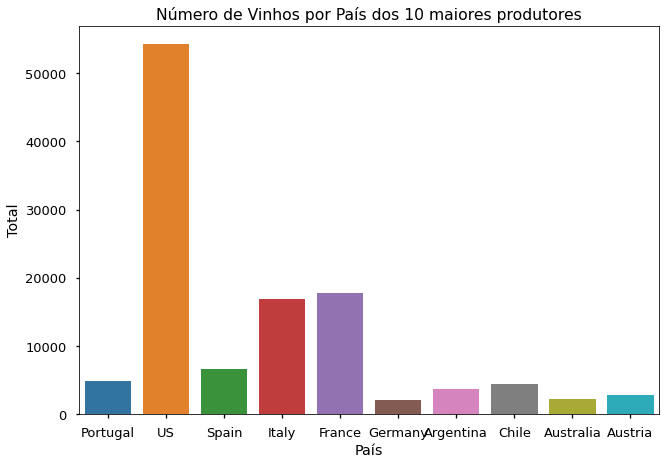

In [14]:
#Gráfico de barras dos 10 top paises produtores
df_pais = df_fil['country'].value_counts().head(10)
df_pais = df_pais.reset_index()
df_pais = df_pais.drop(['country'],axis=1)
df_to_pas = df_fil[df_fil['country'].isin(df_pais['index'])]
sb.countplot(x='country',data=df_to_pas)
plt.title('Número de Vinhos por País dos 10 maiores produtores')
plt.xlabel('País')
plt.ylabel('Total')
plt.show()

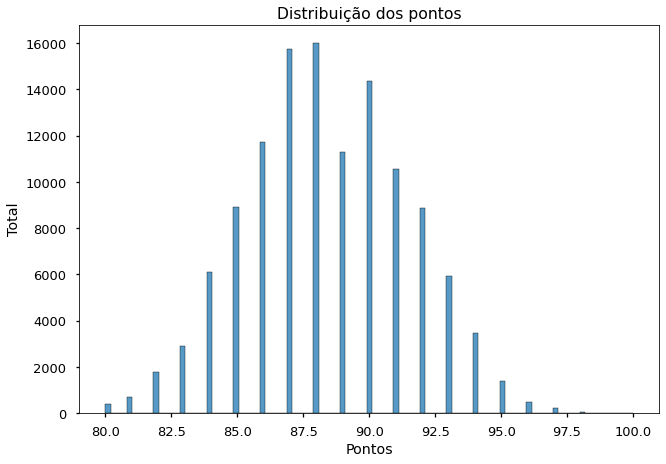

In [15]:
#Histograma dos pontos de vinhos
sb.histplot(x='points',data=df_fil)
plt.title('Distribuição dos pontos')
plt.xlabel('Pontos')
plt.ylabel('Total')
plt.show()

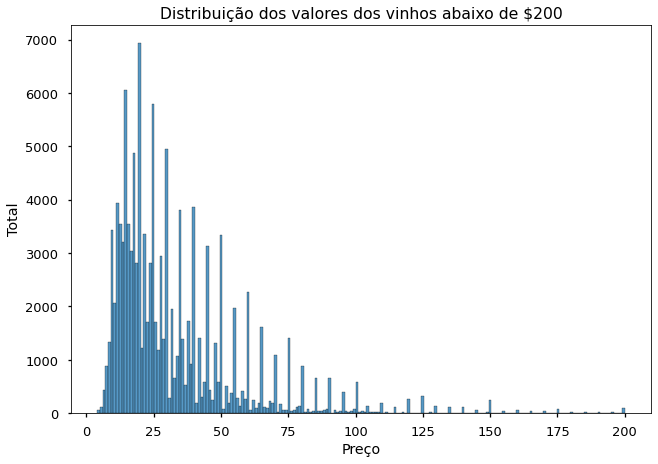

In [16]:
#Distribuição do preço dos vinhos evitando distorções causadas por outliers
valor = list(range(0,201))
df_val = df_fil[df_fil.price.isin(valor)]
sb.histplot(x='price',data=df_val)
plt.title('Distribuição dos valores dos vinhos abaixo de $200')
plt.xlabel('Preço')
plt.ylabel('Total')
plt.show()

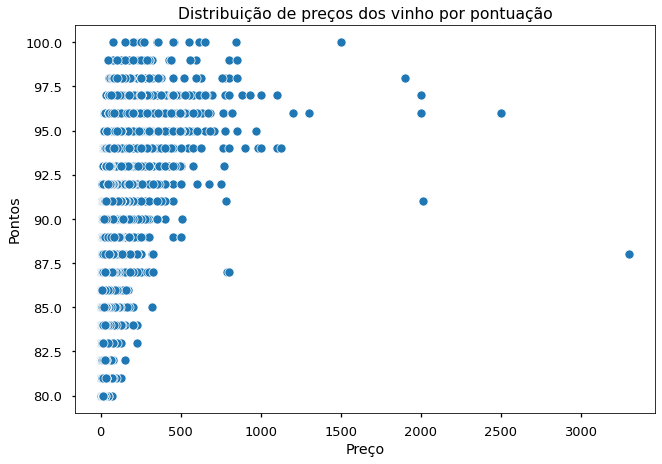

In [21]:
#Correlação entre o preço e a pontuação dos vinhos
sb.scatterplot(x=df_fil['price'],y=df_fil['points'],data=df_fil)
plt.title('Distribuição de preços dos vinho por pontuação')
plt.xlabel('Preço')
plt.ylabel('Pontos')
plt.show()

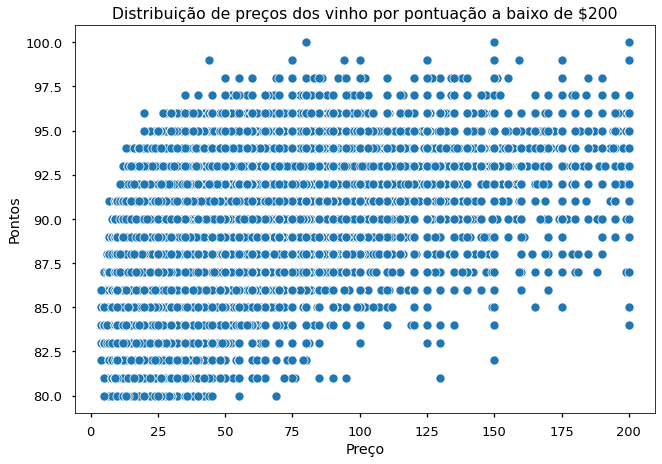

In [23]:
#Correlação entre o preço e a pontuação dos vinhos a baixo de $200
sb.scatterplot(x=df_val['price'],y=df_val['points'],data=df_val)
plt.title('Distribuição de preços dos vinho por pontuação a baixo de $200')
plt.xlabel('Preço')
plt.ylabel('Pontos')
plt.show()

### Parte 2 - Manipulação e Limpeza dos Dados

In [24]:
#Preparando os dados
#Para essa classificação vamos usar os Top 10 países e os 15 top variedades de vinho
df_clus = df_to_pas.drop(['description','province','title','winery'],axis=1)

In [25]:
#Qual é o número de vinhos das top 15 variedades nos países escolhidos?
print(np.sum(df_clus['variety'].value_counts().head(15)))

76191


In [28]:
#Criando dataframe com as variedades de vinhos
df_vinho = df_fil['variety'].value_counts().head(15)
df_vinho = df_vinho.reset_index()
df_vinho = df_vinho.drop(['variety'],axis=1)
print(df_vinho)

                       index
0                 Pinot Noir
1                 Chardonnay
2         Cabernet Sauvignon
3                  Red Blend
4   Bordeaux-style Red Blend
5                   Riesling
6            Sauvignon Blanc
7                      Syrah
8                       Rosé
9                     Merlot
10                 Zinfandel
11                    Malbec
12                Sangiovese
13                  Nebbiolo
14            Portuguese Red


In [30]:
#Filtrando a tabela só com as variedades selecionadas
df_clus = df_clus[df_clus['variety'].isin(df_vinho['index'])]

,country,points,price,variety
1,Portugal,87,15.0,Portuguese Red
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir
10,US,87,19.0,Cabernet Sauvignon
12,US,87,34.0,Cabernet Sauvignon
...,...,...,...,...
129950,US,90,35.0,Zinfandel
129952,US,90,22.0,Zinfandel
129960,Portugal,90,48.0,Pinot Noir
129966,Germany,90,28.0,Riesling


In [31]:
#Transformando categorias de países e variedades em números
print(df_clus['country'].value_counts())
print(df_clus['variety'].value_counts())
df_clus['country'] = df_clus['country'].map({'US':1,'France':2,'Italy':3,'Chile':4,'Argentina':5,'Portugal':6,'Germany':7,'Spain':8,'Australia':9,'Austria':10})
df_clus['variety'] = df_clus['variety'].map({'Pinot Noir':1,'Chardonnay':2,'Cabernet Sauvignon':3,'Red Blend':4,'Bordeaux-style Red Blend':5,
                                             'Riesling':6,'Sauvignon Blanc':7,'Syrah':8,'Rosé':9,'Merlot':10,'Zinfandel':11,'Malbec':12,
                                             'Sangiovese':13,'Nebbiolo':14,'Portuguese Red':15})

US           42729
France       11134
Italy         8296
Chile         3481
Argentina     2977
Portugal      2536
Germany       1833
Spain         1182
Australia     1151
Austria        872
Name: country, dtype: int64
Pinot Noir                  12191
Chardonnay                  10656
Cabernet Sauvignon           9086
Red Blend                    8083
Bordeaux-style Red Blend     5160
Riesling                     4836
Sauvignon Blanc              3973
Syrah                        3937
Rosé                         3172
Merlot                       2906
Zinfandel                    2708
Malbec                       2586
Sangiovese                   2376
Nebbiolo                     2325
Portuguese Red               2196
Name: variety, dtype: int64


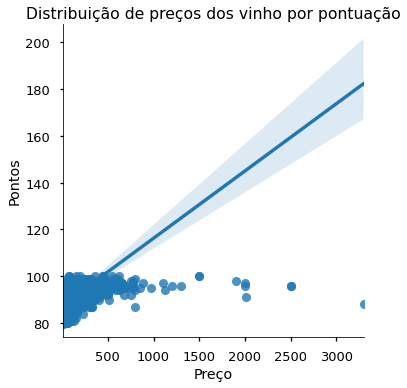

In [32]:
sb.lmplot(x='price',y='points',data=df_clus)
plt.title('Distribuição de preços dos vinho por pontuação')
plt.xlabel('Preço')
plt.ylabel('Pontos')
plt.show()

In [35]:
#Eliminando vinhos > $500

#Criando lista de valores
valor2 = list(range(0,501))

#Filtrando a tabela com os valores da lista
df_clus = df_clus[df_clus.price.isin(valor2)]

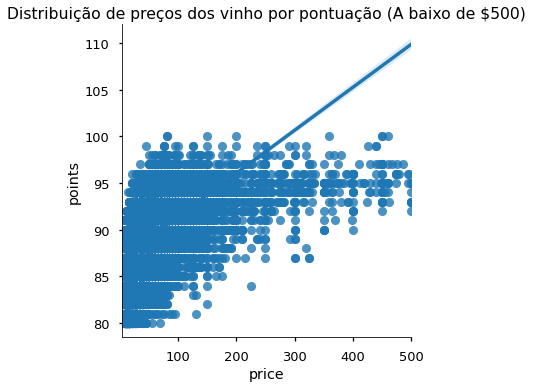

In [36]:
#Verificando a nova distribuição
sb.lmplot(x='price',y='points',data=df_clus)
plt.title('Distribuição de preços dos vinho por pontuação (A baixo de $500)')
plt.show()

### Parte 3 - Aplicando o Algoritmo de Clusterização

In [37]:
#Normalizando os dados
from sklearn.preprocessing import normalize
df_norm = normalize(df_clus)

In [38]:
#Verificando o valor de K com método do cotovelo
variacao = []
ranger = list(range(1,10))
for x in ranger:
    from sklearn.cluster import KMeans
    k_mean = KMeans(n_clusters=x)
    k_mean.fit(df_norm)
    variacao.append(k_mean.inertia_)

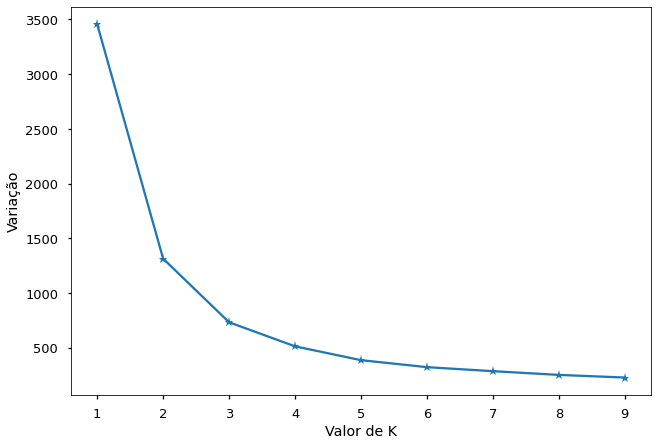

In [39]:
#Verificando o ponto do cotovelo
plt.plot(ranger,variacao,marker='*')
plt.xlabel('Valor de K')
plt.ylabel('Variação')
plt.show()

Vamos com 5 para o número de clusters para o modelo

In [40]:
#Aplicando o algoritmo K-Means
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=5)
df_k = k_mean.fit_predict(df_norm)
df_clus['KMeans'] = df_k

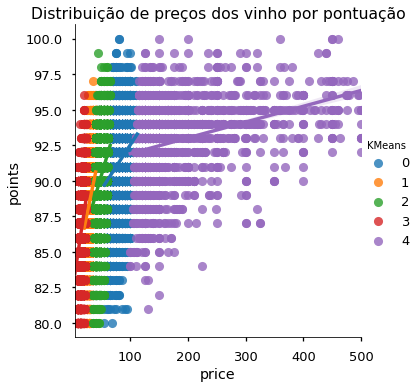

In [41]:
#Verificando os clusters feitos
sb.lmplot(x='price',y='points',data=df_clus,hue='KMeans')
plt.title('Distribuição de preços dos vinho por pontuação')
plt.show()

Resumo: Não vale a pena comprar vinhos de mais de $100 

## Fim
Esse é um exemplo simples clusterização.